In [1]:
import numpy
import pandas

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
dataFrame = pandas.read_csv("/content/drive/MyDrive/MLAA/Assignment 2/Datasets/training.csv")

In [3]:
genderDictionary = {"Male" : 1,
                    "Female" : 2,
                    numpy.nan : 3}

ageBandDictionary = {"1. <25" : 1,
                     "2. 25 to 34" : 2,
                     "3. 35 to 44" : 3,
                     "4. 45 to 54" : 4,
                     "5. 55 to 64" : 5,
                     "6. 65 to 74" : 6,
                     "7. 75+": 7,
                     numpy.nan : 0}

carSegmentDictionary = {"Small/Medium" : 1,
                        "Large/SUV" : 2,
                        "LCV" : 3,
                        "Other" : 4}

carModelDictionary = {"model_1" : 1,
                      "model_2" : 2,
                      "model_3" : 3,
                      "model_4" : 4,
                      "model_5" : 5,
                      "model_6" : 6,
                      "model_7" : 7,
                      "model_8" : 8,
                      "model_9" : 9,
                      "model_10" : 10,
                      "model_11" : 11,
                      "model_12" : 12,
                      "model_13" : 13,
                      "model_14" : 14,
                      "model_15" : 15,
                      "model_16" : 16,
                      "model_17" : 17,
                      "model_18" : 18,
                      "model_19" : 19}

In [4]:
dataFrame["gender"].replace(genderDictionary, inplace=True)
dataFrame["age_band"].replace(ageBandDictionary, inplace=True)
dataFrame["car_model"].replace(carModelDictionary, inplace=True)
dataFrame["car_segment"].replace(carSegmentDictionary, inplace=True)

In [5]:
dataFrame.dropna(how='any', inplace=True)
dataFrame.isna().sum()

ID                           0
Target                       0
age_band                     0
gender                       0
car_model                    0
car_segment                  0
age_of_vehicle_years         0
sched_serv_warr              0
non_sched_serv_warr          0
sched_serv_paid              0
non_sched_serv_paid          0
total_paid_services          0
total_services               0
mth_since_last_serv          0
annualised_mileage           0
num_dealers_visited          0
num_serv_dealer_purchased    0
dtype: int64

In [6]:
y = dataFrame.pop("Target")
dataFrame = dataFrame[["age_of_vehicle_years", "sched_serv_warr", "non_sched_serv_warr", "sched_serv_paid", "total_paid_services", "total_services", "mth_since_last_serv", "annualised_mileage"]]

X_train, X_test, y_train, y_test = train_test_split(dataFrame, y, test_size=0.20, random_state=42)

In [7]:
y_mode = y.mode()
y_base = numpy.full(y_train.shape, y_mode)

print("Accuracy Score : ", accuracy_score(y_train, y_base))
print("F1 Score : ", f1_score(y_train, y_base, average='weighted'))

Accuracy Score :  0.9727702747718167
F1 Score :  0.9593433351879643



 Training Data :
0.99891499871513

 Testing Data :
0.9894548500076138


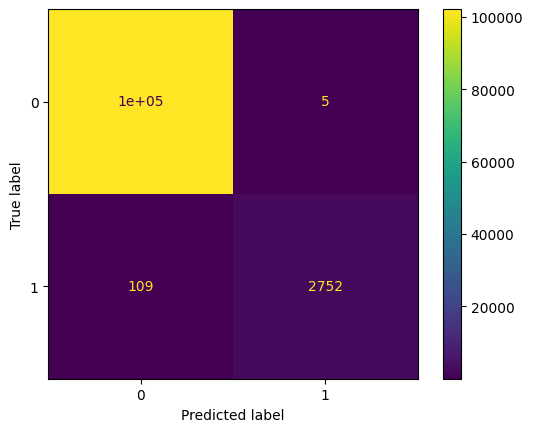

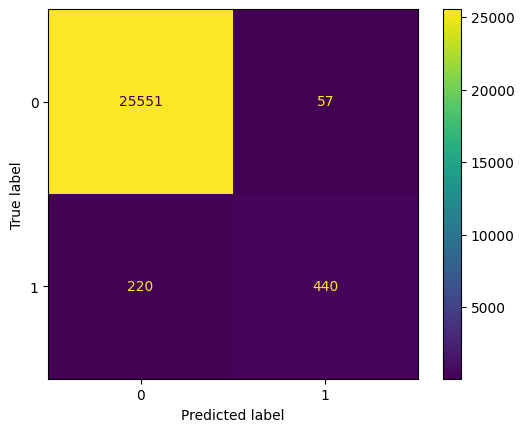

In [8]:
baseRandomForest = RandomForestClassifier(random_state=8)
baseRandomForest.fit(X_train, y_train)

print("\n Training Data :")
print(baseRandomForest.score(X_train, y_train))
print("\n Testing Data :")
print(baseRandomForest.score(X_test, y_test))

ConfusionMatrixDisplay.from_estimator(baseRandomForest, X_train, y_train)
ConfusionMatrixDisplay.from_estimator(baseRandomForest, X_test, y_test)


 Training Data :
0.9500518706754609

 Testing Data :
0.9481879092431856


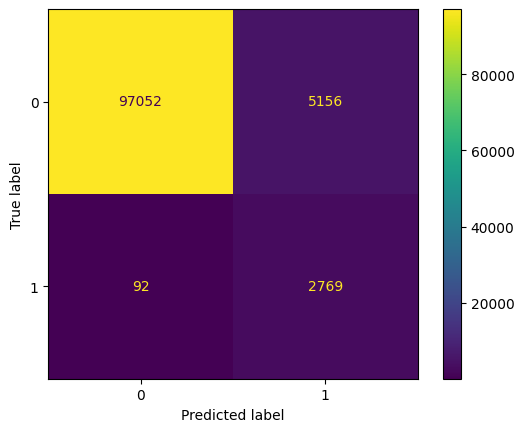

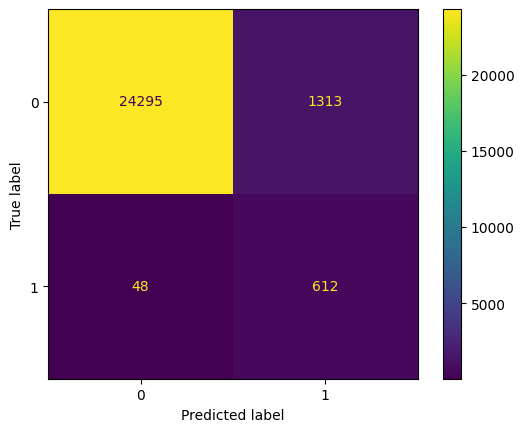

In [10]:
estimator = RandomForestClassifier(random_state=8, class_weight="balanced", 
                                   criterion="log_loss", min_samples_split=200, max_features="log2")
estimator.fit(X_train, y_train)

print("\n Training Data :")
print(estimator.score(X_train, y_train))
print("\n Testing Data :")
print(estimator.score(X_test, y_test))

ConfusionMatrixDisplay.from_estimator(estimator, X_train, y_train)
ConfusionMatrixDisplay.from_estimator(estimator, X_test, y_test)